In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [110]:
data = pd.read_csv(r'C:\Users\balmu\Downloads\archive\swedish_insurance.csv')
x_train = np.array(data["X"])
y_train = np.array(data["Y"])

# x_train = np.array([1.0, 2.0])   #features
# y_train = np.array([300.0, 500.0])   #target value

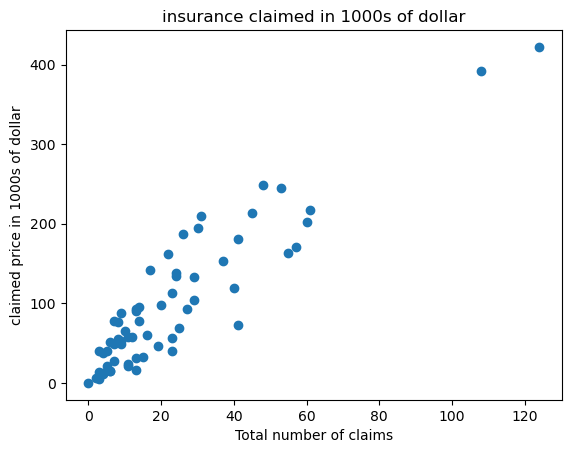

In [111]:
plt.scatter(x_train, y_train)
plt.title("insurance claimed in 1000s of dollar")
plt.xlabel("Total number of claims")
plt.ylabel("claimed price in 1000s of dollar")
plt.show()

In [112]:
# defining the model
# w = 200
# b = 120
y = []
m = x_train.shape[0]
for i in range(m):
    y.append(w * x_train[i] + b)

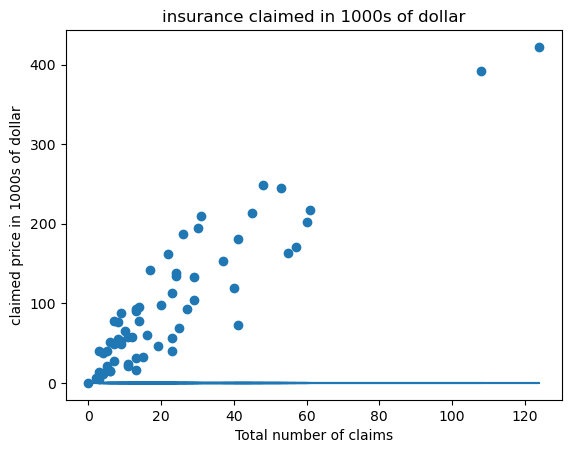

In [113]:
# plotting based on model prediction
plt.scatter(x_train, y_train)
plt.plot(x_train,y)
plt.title("insurance claimed in 1000s of dollar")
plt.xlabel("Total number of claims")
plt.ylabel("claimed price in 1000s of dollar")
plt.show()


In [123]:
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value
w = 0
b = 0

In [124]:
# cost function for checking how good the model is working
def cost_function(x_in,y_in, w, b):
    m = x_in.shape[0]
    total_error = 0
    for i in range(m):
        error = ((w * x_in[i]) - y_in[i]) **2
        total_error += error
        j_wb = (1/2*m) * total_error
    return j_wb

In [125]:
# cost_function(x_train,y_train,w,b)

In [126]:
# calculating the derivatie for the gradient descent
def compute_gradient(x_in,y_in,w,b):
    m = x_in.shape[0]
    dj_dw = 0
    dj_db = 0 
    for i in range(m):
        w_i = (w * x_in[i] + b  - y_in[i]) * x_in[i]
        b_i = w * x_in[i] + b - y_in[i] 
        dj_db += b_i
        dj_dw += w_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db
        
        

In [127]:
# compute_gradient(x_train, y_train, w,b)

In [132]:
# calculating gradient descent
def gradient_descent(x_in,y_in,cost_function, compute_gradient, iterNumber, w_in, b_in,alpha):
    j_history = []
    p_history = []
    w = w_in
    b = b_in
    for i in range(iterNumber):
        dj_dw, dj_db = compute_gradient(x_in, y_in, w, b)
#       updating values of b and w simultaneously 
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
        if i < 100000:
            j_history.append(cost_function(x_train,y_train,w,b))
            p_history.append([w,b])
    
        if i% math.ceil(iterNumber /10) == 0:
#             print(f"Iternation Number: {i} Cost : {j_history[-1]} dj_dw : {dj_dw} dj_db: {dj_db}",
#                   f"w : {w} b:{b}")
            print(f"Iteration {i:4}: Cost {j_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
            
    return w,b
    

In [133]:
alpha = 1.0e-2
w_init = 0
b_init = 0
iterNumber = 10000
w,b = gradient_descent(x_train,y_train, cost_function, compute_gradient, iterNumber, w_init, b_init, alpha)
print(f"final answers {w}, b is {b}")

Iteration    0: Cost 3.23e+05  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 2.32e+04  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 2.15e+04  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 2.07e+04  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 2.03e+04  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 2.02e+04  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.01e+04  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 2.00e+04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 2.00e+04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.00e+04  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02
